<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


<hr>


## Download database file

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-07-24 08:05:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  52.3MB/s    in 0.7s    

2024-07-24 08:05:35 (52.3 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


None


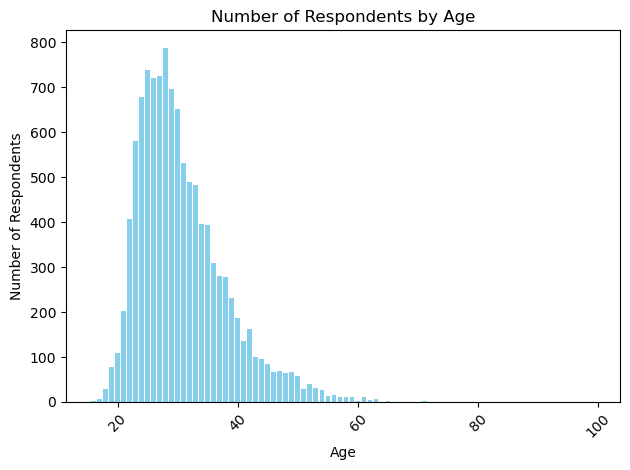

In [6]:
# print number of respondents by age
QUERY = """
SELECT Age, COUNT(*) as count
FROM master
GROUP BY Age
ORDER BY Age
"""

# Read SQL data in a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

print(df.dropna(inplace=True))

# Create a histogramplt.figure(figsize=(10, 6))
plt.bar(df['Age'], df['count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Number of Respondents by Age')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


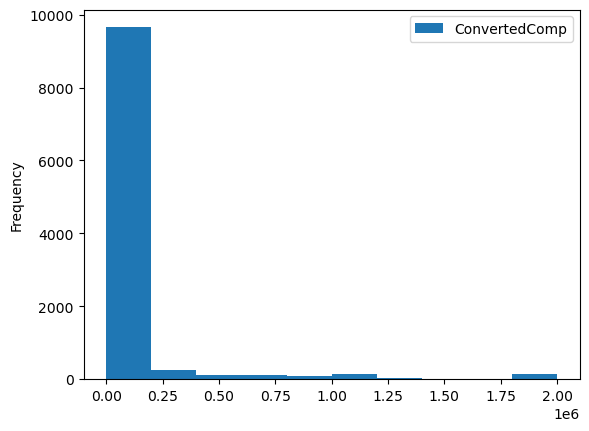

In [8]:
QUERY1 = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY1,conn)
df.head()
df.plot(kind='hist')

plt.show()

### Box Plots


Plot a box plot of `Age.`


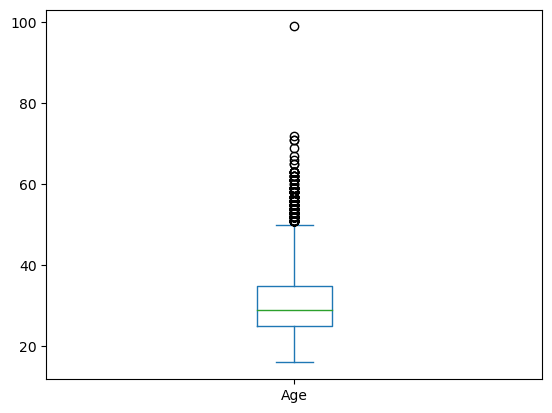

In [9]:
QUERY2 = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY2,conn)
df.head()
df.plot(kind='box')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


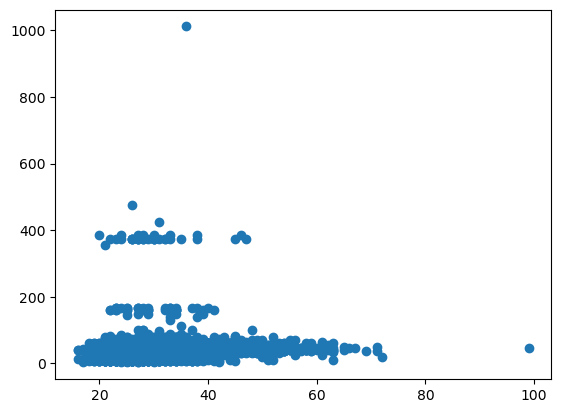

In [10]:
Age = pd.read_sql_query(QUERY2, conn)
WWH = pd.read_sql_query('SELECT WorkWeekHrs FROM master', conn)

Query3 = """
SELECT Age, WorkWeekHrs
FROM master
"""
Age_WWH = pd.read_sql_query(Query3, conn)
plt.scatter(x = Age, y = WWH)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


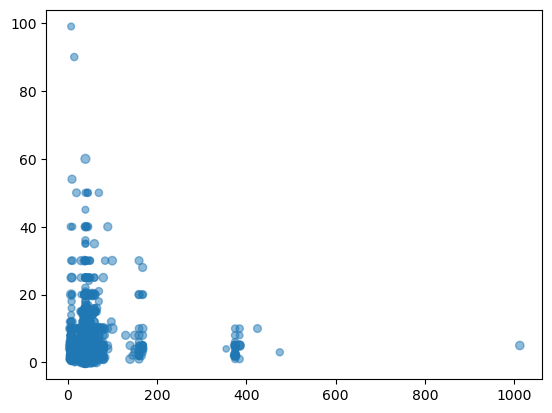

In [11]:
CRH = pd.read_sql_query('SELECT CodeRevHrs FROM master', conn)

Query4 = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
"""
Age_WWH = pd.read_sql_query(Query4, conn)
plt.scatter(x = WWH, y = CRH, s = Age, alpha=0.5)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [12]:
Query5 = """
SELECT DatabaseDesireNextYear as Database, count(*) as No_of_respondents
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear 
ORDER BY No_of_respondents DESC LIMIT 5"""

db_df = pd.read_sql_query(Query5, conn)
print(db_df)

        Database  No_of_respondents
0     PostgreSQL               4328
1        MongoDB               3649
2          Redis               3331
3          MySQL               3281
4  Elasticsearch               2856


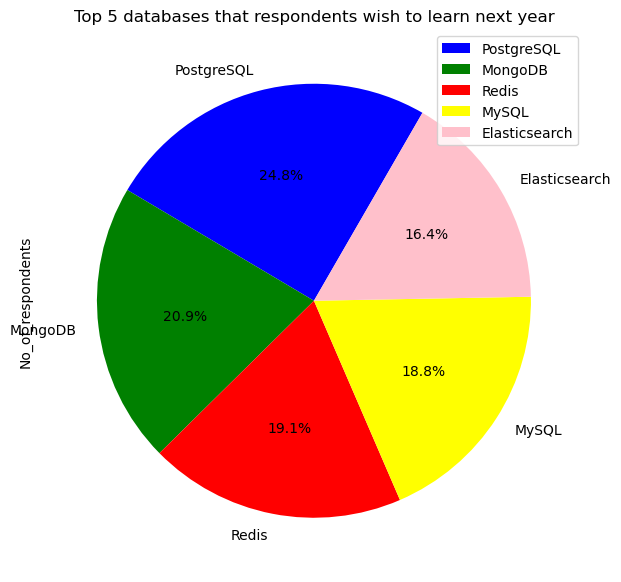

In [13]:
db_df.plot(kind = 'pie', labels = db_df['Database'], y = 'No_of_respondents',
figsize = (7,10), #dimension of the chart window
autopct='%1.1f%%', #autopct displays percentages in pie chart. so .1f% rounds to 1 decimal place.
colors = ['blue', 'green', 'red', 'yellow', 'pink'], #colours of the pie chart items
startangle = 60) #start Angle implies that we can rotate the pie chart according to the degree angle we specify  
plt.title('Top 5 databases that respondents wish to learn next year')

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 20 to 60.


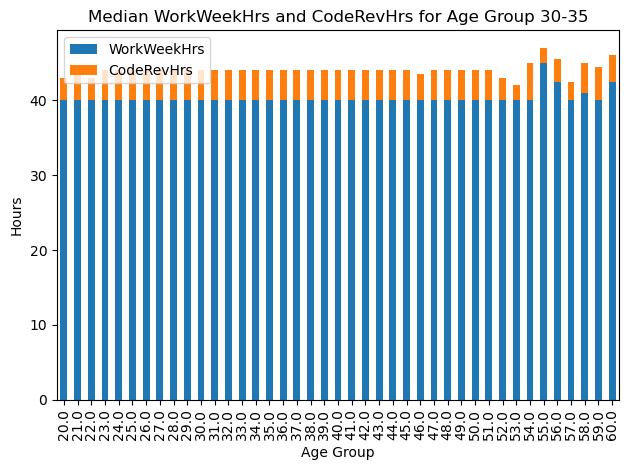

In [14]:
Query6 = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 20 AND 60
"""
stacked_df = pd.read_sql_query(Query6, conn)

# Group by Age and calculate median WorkWeekHrs and CodeRevHrs
grouped_df = stacked_df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

# Plotting the stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Hours')
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')

# Show plot
plt.tight_layout()
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [15]:
Query7 = """SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""

line_df = pd.read_sql_query(Query7, conn)
line_df.describe()

,ConvertedComp,Age
count,5.610000e+02,599.000000
mean,1.876936e+05,49.460768
std,3.387617e+05,3.688731
min,0.000000e+00,45.000000
25%,6.627600e+04,46.000000
50%,1.000000e+05,49.000000
75%,1.400000e+05,52.000000
max,2.000000e+06,60.000000


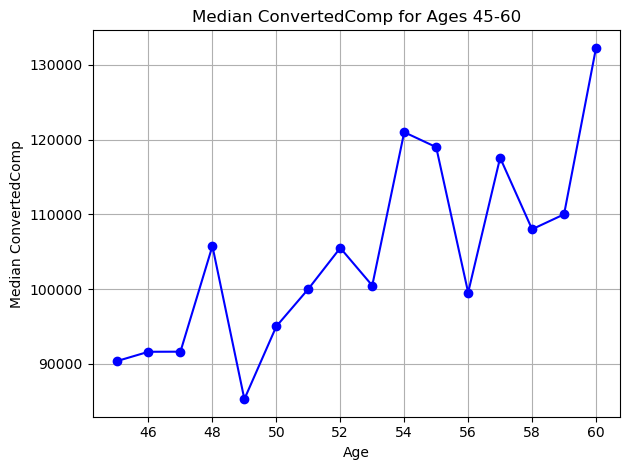

In [16]:
# Calculate median ConvertedComp for ages 45 to 60
median_convertedcomp = line_df.groupby('Age')['ConvertedComp'].median()

# Filter median data for ages 45 to 60
filtered_median = median_convertedcomp[(median_convertedcomp.index >= 45) & (median_convertedcomp.index <= 60)]

# Plotting the line chart
plt.plot(filtered_median.index, filtered_median.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Median ConvertedComp for Ages 45-60')

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


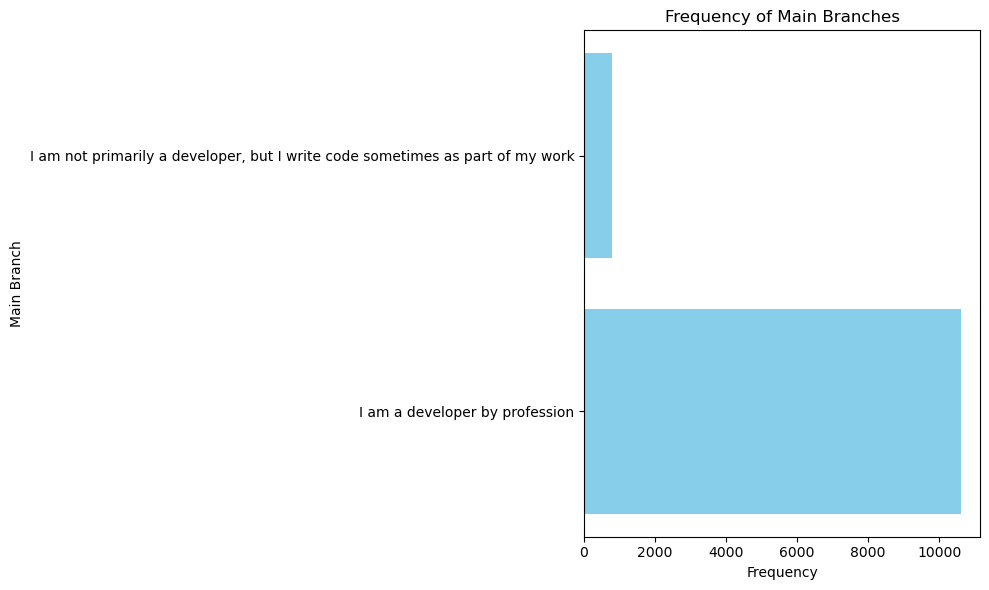

In [17]:
Query8 = """SELECT MainBranch, count(*) as Frequency FROM master GROUP BY MainBranch"""
bar_df = pd.read_sql_query(Query8, conn)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(bar_df['MainBranch'], bar_df['Frequency'], color='skyblue')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Main Branch')
plt.title('Frequency of Main Branches')

# Show plot
plt.tight_layout()
plt.show()

Close the database connection.


In [18]:
conn.close()

 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
